## Prelude

In [1]:
%pip install datasets
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 542 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 60.3 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.6 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 401 kB 50.9 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 31.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 9.7 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 34.8 MB/s eta 0:00:01
     |████████████████████████████████| 401 kB 62.2 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 11.4 MB/s eta 0:00:01
     |████████████████████

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import os
import json

from math import exp

Matplotlib is building the font cache; this may take a moment.


In [3]:
SEED = 42

In [4]:
from calibration_dataset import CalibrationDataset
from calibration_run import CalibrationRun
import gsm8k_helpers
import math_helpers
from cost_acc_gen import cost_acc_curve_points

/Users/Family/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/Family/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/hendrycks/math.git to /private/var/folders/cd/tvz6m38s0sj69mjqw_mcf4sc0000gn/T/pip-req-build-tje_8z5e


  Running command git clone -q https://github.com/hendrycks/math.git /private/var/folders/cd/tvz6m38s0sj69mjqw_mcf4sc0000gn/T/pip-req-build-tje_8z5e


  Resolved https://github.com/hendrycks/math.git to commit 357963a7f5501a6c1708cf3f3fb0cdf525642761
  Created wheel for math-equivalence: filename=math_equivalence-0.0.0-py3-none-any.whl size=3519 sha256=1f164414071a41d3d62ef65f484953671e44505daf2e2222a40c04aeadc7ccf1
  Stored in directory: /private/var/folders/cd/tvz6m38s0sj69mjqw_mcf4sc0000gn/T/pip-ephem-wheel-cache-ewpa46dz/wheels/04/c6/54/12ae5a916e0395b8ac72f53ff67547d4a9a2816cb2d3966ee2
Successfully built math-equivalence


You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
gsm8k_df = gsm8k_helpers.get_test_df()

In [6]:
math_df = math_helpers.get_math_df(data_path="./MATH", split="test")

## GSM8K

In [18]:
gsm8k_all = CalibrationDataset(
    dataset_name="gsm8k_all",
    df = gsm8k_df,
    is_equiv = gsm8k_helpers.is_equiv,
    get_value_from_response=gsm8k_helpers.str_to_num_parser,
    get_prompt_content=gsm8k_helpers.get_prompt_content,
    get_value_tokens_prob=gsm8k_helpers.get_tokens_prob,
    seed=SEED,
)

### All 8B

In [19]:
gsm8k_all_llama3_8b = CalibrationRun(
    dataset=gsm8k_all,
    model_name="meta-llama/Meta-Llama-3-8B-Instruct",
    num_questions=1319,
    num_attempts_per_question=20,
    num_shots=5,
    max_response_tokens=1000,
    requests_file_path="requests/gsm8k_all_llama3_8b.jsonl",
    results_file_pattern="results/gsm8k_all_llama3_8b.jsonl*",
)
# gsm8k_all_llama3_8b.write_requests_file()
gsm8k_all_llama3_8b.read_results_file()

Lines dropped: 0


100%|██████████| 26380/26380 [00:00<00:00, 184616.34it/s]


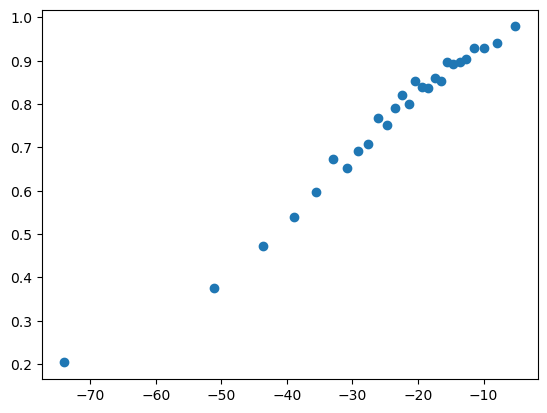

In [23]:
binned = gsm8k_all_llama3_8b.get_binned(confidence_estimator="all_tokens_logprob", qa_pairs_per_bin=1000)
plt.scatter(binned["all_tokens_logprob"], binned['correct'])

Binned r2 (qa_pairs_per_bin=100): 0.8780153397468727


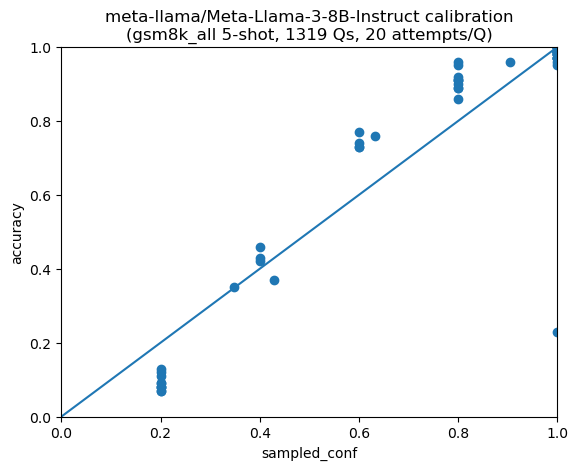

Binned r2 (qa_pairs_per_bin=100): 0.9062680511059268


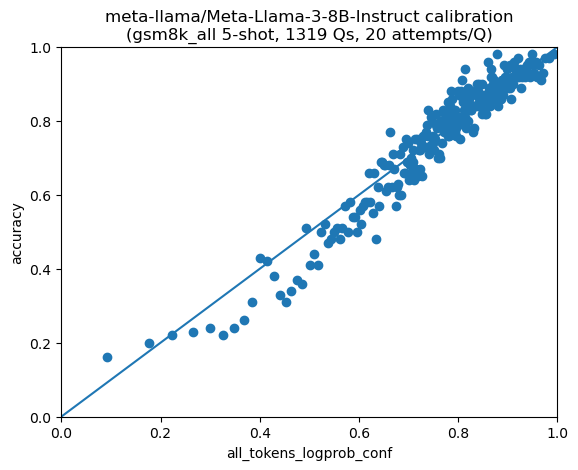

In [19]:
gsm8k_all_llama3_8b.plot_estimated_confidence_vs_accuracy(confidence_estimator="sampled_conf", qa_pairs_per_bin=100)
gsm8k_all_llama3_8b.plot_estimated_confidence_vs_accuracy(confidence_estimator="all_tokens_logprob_conf", qa_pairs_per_bin=100)

### All 70B

In [10]:
gsm8k_all_llama3_70b = CalibrationRun(
    dataset=gsm8k_all,
    model_name="meta-llama/Meta-Llama-3-70B-Instruct",
    num_questions=1319,
    num_attempts_per_question=20,
    num_shots=5,
    max_response_tokens=1000,
    requests_file_path="requests/gsm8k_all_llama3_70b.jsonl",
    results_file_pattern="results/gsm8k_all_llama3_70b.jsonl*",
)
# gsm8k_all_llama3_70b.write_requests_file()
gsm8k_all_llama3_70b.read_results_file()

Lines dropped: 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26380/26380 [00:00<00:00, 204839.58it/s]


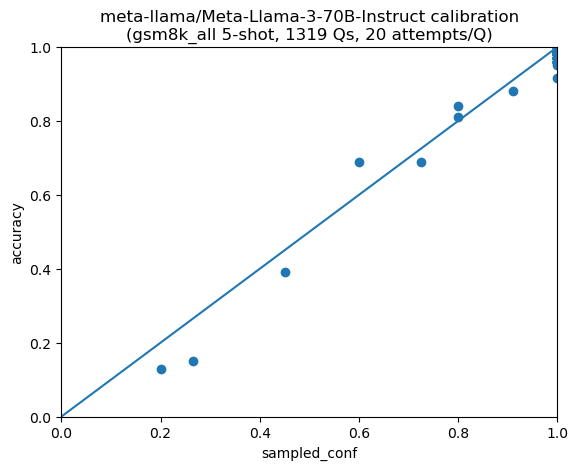

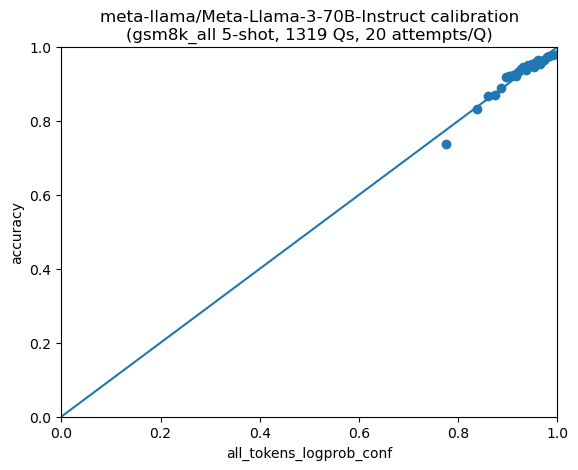

In [11]:
gsm8k_all_llama3_70b.plot_estimated_confidence_vs_accuracy(confidence_estimator="sampled_conf", qa_pairs_per_bin=100)
gsm8k_all_llama3_70b.plot_estimated_confidence_vs_accuracy(confidence_estimator="all_tokens_logprob_conf", qa_pairs_per_bin=1000)

### Cost-Accuracy Tradeoff

#### Sampled Confidence

Text(0, 0.5, 'Accuracy')

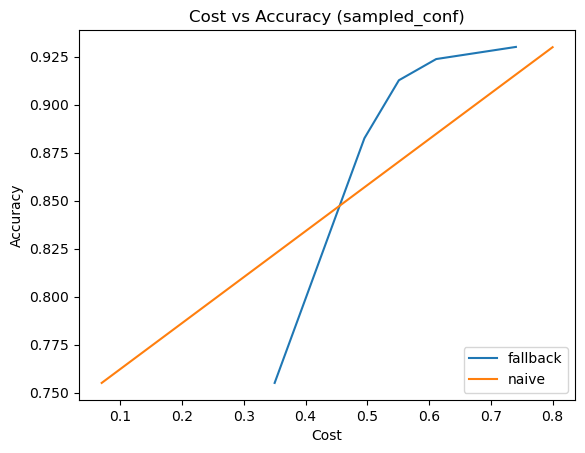

In [12]:
cost_acc_df = cost_acc_curve_points(
    confidence_estimator="sampled_conf",
    run_small=gsm8k_all_llama3_8b,
    run_big=gsm8k_all_llama3_70b,
    cost_small=0.07,
    cost_big=0.8
)

cost_acc_df = pd.concat([pd.DataFrame([[0, 0.35, 0.755]], columns=cost_acc_df.columns), cost_acc_df], ignore_index=True) # hack to fill NAs at low confidence thresholds
cost_acc_df = cost_acc_df.dropna()

fig, ax = plt.subplots()
plt.plot(cost_acc_df['cost'], cost_acc_df['acc'], label='fallback')
ax.plot([0.07,0.8],[0.755,0.93], label='naive') # hacky way to draw line
plt.legend(loc='lower right')
plt.title("Cost vs Accuracy (sampled_conf)")
plt.xlabel("Cost")
plt.ylabel("Accuracy")

#### All Tokens Logprob Confidence

Text(0, 0.5, 'Accuracy')

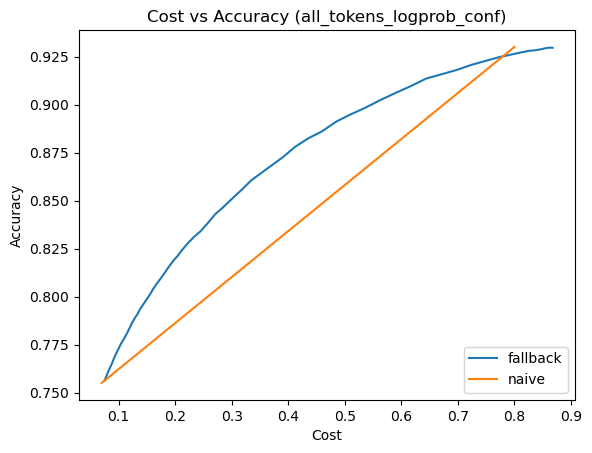

In [13]:
cost_acc_df = cost_acc_curve_points(
    confidence_estimator="all_tokens_logprob_conf",
    run_small=gsm8k_all_llama3_8b,
    run_big=gsm8k_all_llama3_70b,
    cost_small=0.07,
    cost_big=0.8
)

fig, ax = plt.subplots()
plt.plot(cost_acc_df['cost'], cost_acc_df['acc'], label='fallback')
ax.plot([0.07,0.8],[0.755,0.93], label='naive')
plt.legend(loc='lower right')
plt.title("Cost vs Accuracy (all_tokens_logprob_conf)")
plt.xlabel("Cost")
plt.ylabel("Accuracy")

## MATH

### 1000Q

In [247]:
math_1000 = CalibrationDataset(
    dataset_name="math_1000",
    df = math_df.sample(1000, random_state=SEED),
    is_equiv = math_helpers.is_equiv,
    get_value_from_response=math_helpers.extract_boxed_expression,
    get_prompt_content=math_helpers.get_prompt_content,
    get_value_tokens_prob=lambda x: None,
    seed=SEED,
)

#### 1000Q 8B

In [16]:
math_1000_llama3_8b = CalibrationRun(
    dataset=math_1000,
    model_name="meta-llama/Meta-Llama-3-8B-Instruct",
    num_questions=1000,
    num_attempts_per_question=20,
    num_shots=5,
    max_response_tokens=5000,
    requests_file_path="requests/math_1000q_llama3_8b.jsonl",
    results_file_pattern="results/math_1000q_llama3_8b.jsonl*",
)
# math_1000_llama3_8b.write_requests_file()
math_1000_llama3_8b.read_results_file()

Lines dropped: 0


100%|██████████| 20000/20000 [00:00<00:00, 137074.36it/s]


Binned r2 (qa_pairs_per_bin=100): 0.6811750251312408


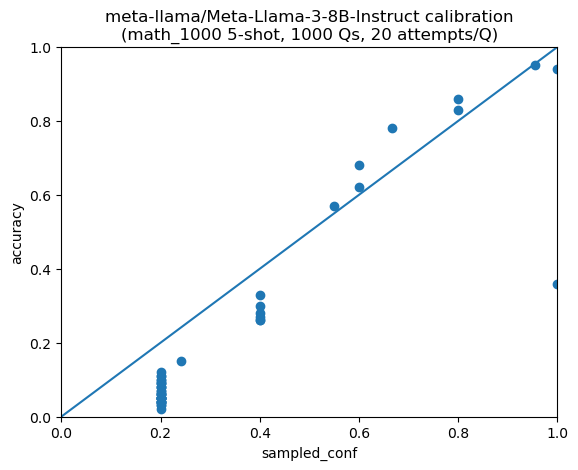

Binned r2 (qa_pairs_per_bin=50): 0.5145134849688329


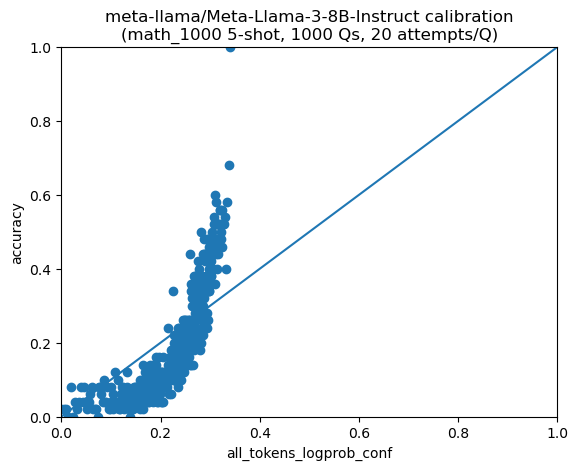

In [9]:
math_1000_llama3_8b.plot_estimated_confidence_vs_accuracy(confidence_estimator="sampled_conf", qa_pairs_per_bin=100)
math_1000_llama3_8b.plot_estimated_confidence_vs_accuracy(confidence_estimator="all_tokens_logprob_conf", qa_pairs_per_bin=50)

#### 1000Q 70B

In [188]:
math_1000_llama3_70b = CalibrationRun(
    dataset=math_1000,
    model_name="meta-llama/Meta-Llama-3-70B-Instruct",
    num_questions=1000,
    num_attempts_per_question=20,
    num_shots=5,
    max_response_tokens=5000,
    requests_file_path="requests/math_1000q_llama3_70b.jsonl",
    results_file_pattern="results/math_1000q_llama3_70b.jsonl*",
)
# math_1000_llama3_8b.write_requests_file()
math_1000_llama3_70b.read_results_file()

Lines dropped: 0


100%|██████████| 20000/20000 [00:00<00:00, 134259.62it/s]


Binned r2 (qa_pairs_per_bin=100): 0.9343016776626772


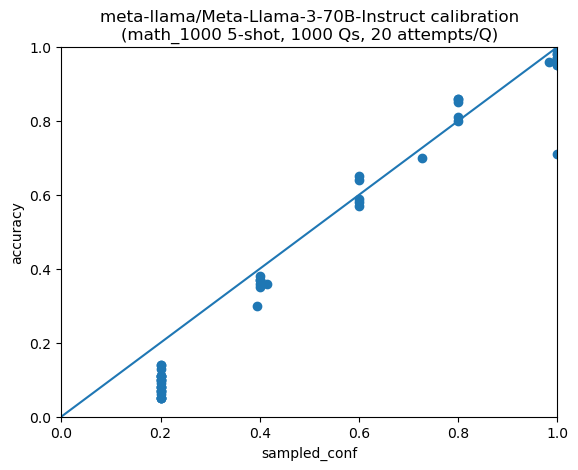

Binned r2 (qa_pairs_per_bin=50): 0.6547342448185918


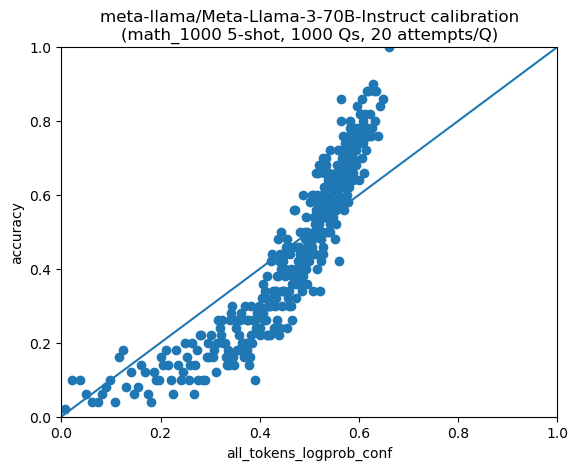

In [189]:
math_1000_llama3_70b.plot_estimated_confidence_vs_accuracy(confidence_estimator="sampled_conf", qa_pairs_per_bin=100)
math_1000_llama3_70b.plot_estimated_confidence_vs_accuracy(confidence_estimator="all_tokens_logprob_conf", qa_pairs_per_bin=50)

### MATH all

In [7]:
math_all = CalibrationDataset(
    dataset_name="math_all",
    df = math_df.copy(),
    is_equiv = math_helpers.is_equiv,
    get_value_from_response=math_helpers.extract_boxed_expression,
    get_prompt_content=math_helpers.get_prompt_content,
    get_value_tokens_prob=lambda x: None,
    seed=SEED,
)

#### all 8B

In [9]:
math_all_llama3_8b = CalibrationRun(
    dataset=math_all,
    model_name="meta-llama/Meta-Llama-3-8B-Instruct",
    num_questions=5000,
    num_attempts_per_question=4,
    num_shots=5,
    max_response_tokens=5000,
    requests_file_path="requests/math_all_4a_250c_llama3_8b.jsonl",
    results_file_pattern="results/math_all_4a_250c_llama3_8b.jsonl*",
    num_choices=250,
)
math_all_llama3_8b.write_requests_file()
# math_all_llama3_8b.read_results_file()

## TriviaQA

## Scratch

In [ ]:
# beta = (math_1000_llama3_8b.results['completion_tokens'] * math_1000_llama3_8b.results['all_tokens_logprob']).sum() / (math_1000_llama3_8b.results['completion_tokens'] ** 2).sum() 
# math_1000_llama3_8b.results['all_tokens_logprob'] = math_1000_llama3_8b.results['all_tokens_logprob'] - beta * math_1000_llama3_8b.results['completion_tokens']

In [ ]:
math_1000_llama3_8b.get_binned(confidence_estimator="all_tokens_logprob_conf", qa_pairs_per_bin=100)

,all_tokens_logprob_conf,correct
bin,,
0,-0.425451,0.02
1,-0.208174,0.01
2,-0.150101,0.03
3,-0.111228,0.00
4,-0.082746,0.01
...,...,...
195,0.323727,0.51
196,0.325803,0.52
197,0.328599,0.53


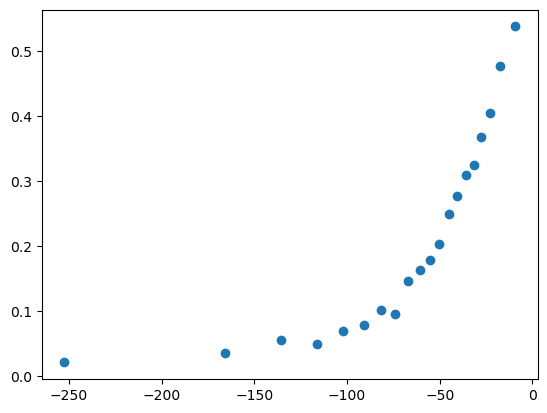

In [ ]:
binned = math_1000_llama3_8b.get_binned(confidence_estimator="all_tokens_logprob", qa_pairs_per_bin=1000)
plt.scatter(binned["all_tokens_logprob"], binned['correct'])

In [ ]:
# print(math_1000.get_examples_text(5))

In [ ]:
from math_equivalence import _strip_string
r = math_1000_llama3_70b.results.copy()
def strip_string(x):
    if x is None:
        return None
    try:
        return _strip_string(x)
    except:
        return None
r['attempt_stripped'] = r['attempt'].apply(math_helpers.extract_boxed_expression).apply(strip_string)
r['answer_stripped'] = r['answer'].apply(math_helpers.extract_boxed_expression).apply(strip_string)
rg = r[['q_id', 'attempt_stripped', 'correct', 'all_tokens_logprob']].groupby(['q_id', 'attempt_stripped']).mean().reset_index()
rg = rg.merge(r[['q_id', 'attempt_stripped']].groupby(['q_id', 'attempt_stripped']).size().reset_index(name='count'), on=['q_id', 'attempt_stripped'])

In [ ]:
rgmc = rg.assign(rng=np.random.rand(len(rg))).sort_values(['count', 'rng'], ascending=False).groupby(['q_id']).first()
rgmc.correct.sum()
# rgmc[rgmc.correct == 0].merge(r[['q_id', 'correct']].rename(columns={'correct': 'pass_20'}).groupby('q_id').max().reset_index(), on='q_id').query('pass_20 == 1').head(10)

574.0

In [ ]:
h = rgmc[rgmc.correct == 0].merge(rg.sort_values(['all_tokens_logprob'], ascending=False).groupby(['q_id']).first(), on='q_id', suffixes=('_count', '_logprob'))

In [ ]:
h = rgmc[rgmc['count'] >= 10].merge(rg.sort_values(['all_tokens_logprob'], ascending=False).groupby(['q_id']).first().query("count > 0"), on='q_id', suffixes=('_count', '_logprob'))
print(h.correct_count.sum(), h.correct_logprob.sum())

451.0 227.0


In [ ]:
qs = rgmc[rgmc['count'] >= 10].reset_index()['q_id']

,q_id,attempt_stripped,correct,all_tokens_logprob,count
0,8,56,0.0,-51.450251,2
1,8,560,1.0,-25.835219,14
2,8,"\binom{8}{3,3,2}=\frac{8!}{3!3!2!}=560",0.0,-18.463191,2
3,8,"\binom{8}{3,3,2}=\frac{8!}{3!\cdot3!\cdot2!}=560",0.0,-22.987544,1
4,8,\frac{8!}{3!3!2!},0.0,-9.703553,1
...,...,...,...,...,...
7715,4981,8+(-8)=0,0.0,-27.026495,1
7727,4995,-2,0.0,-31.378442,1
7728,4995,-7,1.0,-16.712976,19
7729,4996,15,1.0,-16.095107,20


In [ ]:
r[r.q_id.isin(qs)].groupby('q_id').sample(1).reset_index().correct.sum()

365

In [ ]:
r[['q_id', 'correct']].rename(columns={'correct': 'pass_20'}).groupby('q_id').max().sum()

pass_20    789
dtype: int64

array([[<Axes: title={'center': 'count'}>]], dtype=object)

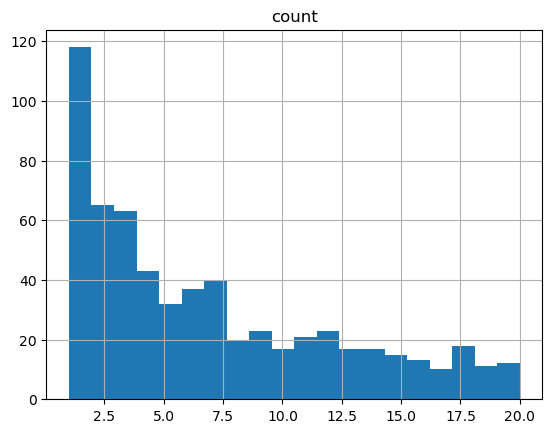

In [ ]:
rg[rg.correct == 1].hist('count', bins=20)